In [23]:
import logging
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

# Setup basic logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Dataset and Feature

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


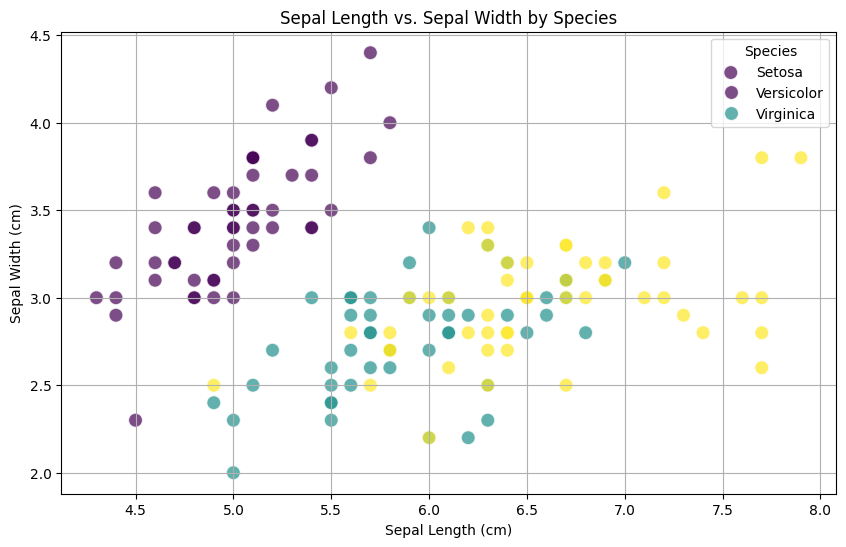

In [20]:
# Load the dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print(iris_df)
iris_df['species'] = iris.target

# Let's visualize the features to understand them better
# We will see how sepal length and width differ by species.
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=iris_df['sepal length (cm)'],
    y=iris_df['sepal width (cm)'],
    hue=iris_df['species'],
    palette='viridis',
    s=100, # size of points
    alpha=0.7
)
plt.title('Sepal Length vs. Sepal Width by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species', labels=['Setosa', 'Versicolor', 'Virginica'])
plt.grid(True)
plt.show()

# Feature Engineering

In [ ]:
# --- Feature Engineering Function ---
# This function calculates new features from the raw data.
# In a real project, this logic could be much more complex.
def create_new_features(df: pd.DataFrame) -> pd.DataFrame:
  """Creates new features for the Iris dataset."""
  df['petal_area (cm^2)'] = df['petal length (cm)'] * df['petal width (cm)']
  df['sepal_area (cm^2)'] = df['sepal length (cm)'] * df['sepal width (cm)']
  return df


2025-06-24 22:59:34,763 - INFO - [Training] Simulating model training...
2025-06-24 22:59:34,767 - INFO - [Training] Created new features: ['petal_area (cm^2)', 'sepal_area (cm^2)'] 


In [22]:

# --- 1. Model Training Phase ---
logging.info("[Training] Simulating model training...")

# Create new features for the whole dataset
iris_featured_df = create_new_features(iris_df.copy())
logging.info(f"[Training] Created new features: {['petal_area (cm^2)', 'sepal_area (cm^2)']} ")

2025-06-24 23:12:09,771 - INFO - [Training] Simulating model training...
2025-06-24 23:12:09,775 - INFO - [Training] Created new features: ['petal_area (cm^2)', 'sepal_area (cm^2)'] 


# Training

In [21]:


# Define features (X) and target (y)
X = iris_featured_df[['petal_area (cm^2)', 'sepal_area (cm^2)']]
y = iris_featured_df['species']

# Split data and train a simple model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
logging.info("[Training] Model training complete.")

# --- 2. Online Inference Phase ---
logging.info("[Inference] Simulating a real-time prediction request...")

# A new online request comes in as a dictionary
new_request_data = {
    'petal length (cm)': [5.1],
    'petal width (cm)': [1.8],
    'sepal length (cm)': [6.2],
    'sepal width (cm)': [3.0]
}
new_request_df = pd.DataFrame(new_request_data)

2025-06-24 23:12:06,399 - INFO - [Training] Model training complete.
2025-06-24 23:12:06,400 - INFO - [Inference] Simulating a real-time prediction request...


# A inference service. but feature engineering is duplicated

In [19]:

# !!! PROBLEM !!!
# The inference service must re-implement the same feature engineering logic.
# This code is duplicated from the training phase.
def create_new_features_for_inference(df: pd.DataFrame) -> pd.DataFrame:
  """Creates new features for the Iris dataset for inference."""
  # This logic MUST be identical to the one used in training.
  df['petal_area (cm^2)'] = df['petal length (cm)'] * df['petal width (cm)']
  df['sepal_area (cm^2)'] = df['sepal length (cm)'] * df['sepal width (cm)']
  return df

# Apply the duplicated logic
inference_df = create_new_features_for_inference(new_request_df)
logging.info("[Inference] Applied duplicated feature logic.")

# Select the features the model expects
inference_features = inference_df[['petal_area (cm^2)', 'sepal_area (cm^2)']]

# Make a prediction
prediction = model.predict(inference_features)
logging.info(f"[Inference] Prediction result: {iris.target_names[prediction][0]}")

2025-06-24 23:02:49,888 - INFO - [Inference] Applied duplicated feature logic.
2025-06-24 23:02:49,892 - INFO - [Inference] Prediction result: virginica
